In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import requests
import os
from dotenv import load_dotenv

# Handle .env path for both scripts and notebooks
try:
    # For .py scripts
    project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    # For Jupyter Notebooks (__file__ not defined)
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Load .env from project root
dotenv_path = os.path.join(project_root, '.env')
load_dotenv(dotenv_path)

# Access environment variables
model_target = os.getenv("MODEL_TARGET")
credentials_path = os.getenv("GOOGLE_APPLICATION_CREDENTIALS")

# Print to check if they are loaded correctly
print(f"Model Target: {model_target}")
print(f"Google Credentials Path: {credentials_path}")


Model Target: local
Google Credentials Path: /Users/maltestaab/Library/Mobile Documents/com~apple~CloudDocs/EDHEC/2. Semester/Business Data Management/edhecbusinessdatamanagement-9705b139c0ff.json


## Import of Dataset from BigQuery

In [3]:
# Path to your Google Cloud service account key file
key_path = credentials_path

# Create credentials and initialize the BigQuery client
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials=credentials, project="edhecbusinessdatamanagement")

In [4]:

query = """
    SELECT * 
    FROM `edhec-business-manageme.luxurydata2502.price-monitoring-2022`
    WHERE Brand = 'Chanel'
"""

# Run the query and load results into a Pandas DataFrame
df = client.query(query).to_dataframe()

# Display the first 5 rows of the dataframe
print(df.head())


/Users/maltestaab/.pyenv/versions/3.8.12/envs/chanelenv/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


     uid   brand                                                url  price  \
0  48802  Chanel  https://www.chanel.com/ch-fr/mode/p/A01112B027...   6980   
1  48803  Chanel  https://www.chanel.com/zh_CN/fashion/p/hdb/a01...  53700   
2  48804  Chanel  https://www.chanel.com/fr/mode/p/A01112B027529...   6640   
3  48805  Chanel  https://www.chanel.com/en_GB/fashion/p/hdb/a01...   5820   
4  48807  Chanel  https://www.chanel.com/hk-zh/fashion/p/A01112B...  53300   

  currency                                          image_url  \
0      CHF  https://www.chanel.com/images///q_auto,f_jpg,f...   
1      CNY  https://www.chanel.com/images///q_auto,f_jpg,f...   
2      EUR  https://www.chanel.com/images///q_auto,f_jpg,f...   
3      GBP  https://www.chanel.com/images///q_auto,f_jpg,f...   
4      HKD  https://www.chanel.com/images///q_auto,f_jpg,f...   

        collection     reference_code country life_span_date  \
0  CLASSIC HANDBAG  A01112B0275294305    None     2020-09-24   
1  CLASSIC H

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55061 entries, 0 to 55060
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   55061 non-null  Int64         
 1   brand                 55061 non-null  object        
 2   url                   55061 non-null  object        
 3   price                 51029 non-null  Int64         
 4   currency              55061 non-null  object        
 5   image_url             47225 non-null  object        
 6   collection            55001 non-null  object        
 7   reference_code        55061 non-null  object        
 8   country               0 non-null      object        
 9   life_span_date        55061 non-null  datetime64[us]
 10  life_span             55061 non-null  object        
 11  price_before          32852 non-null  float64       
 12  price_difference      55061 non-null  Int64         
 13  price_percent_ch

In [6]:
df = df.drop(["country","is_new", "image_url"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55061 entries, 0 to 55060
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   55061 non-null  Int64         
 1   brand                 55061 non-null  object        
 2   url                   55061 non-null  object        
 3   price                 51029 non-null  Int64         
 4   currency              55061 non-null  object        
 5   collection            55001 non-null  object        
 6   reference_code        55061 non-null  object        
 7   life_span_date        55061 non-null  datetime64[us]
 8   life_span             55061 non-null  object        
 9   price_before          32852 non-null  float64       
 10  price_difference      55061 non-null  Int64         
 11  price_percent_change  55061 non-null  float64       
 12  price_changed         55061 non-null  float64       
dtypes: Int64(3), dat

In [8]:
df = df.dropna(subset=['price'])
df = df.dropna(subset=['collection'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50971 entries, 0 to 55060
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   50971 non-null  Int64         
 1   brand                 50971 non-null  object        
 2   url                   50971 non-null  object        
 3   price                 50971 non-null  Int64         
 4   currency              50971 non-null  object        
 5   collection            50971 non-null  object        
 6   reference_code        50971 non-null  object        
 7   life_span_date        50971 non-null  datetime64[us]
 8   life_span             50971 non-null  object        
 9   price_before          32682 non-null  float64       
 10  price_difference      50971 non-null  Int64         
 11  price_percent_change  50971 non-null  float64       
 12  price_changed         50971 non-null  float64       
dtypes: Int64(3), datetime

In [10]:
df.head()

,uid,brand,url,price,currency,collection,reference_code,life_span_date,life_span,price_before,price_difference,price_percent_change,price_changed
0,48802,Chanel,https://www.chanel.com/ch-fr/mode/p/A01112B027...,6980,CHF,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,NaN,0,0.0,0.0
1,48803,Chanel,https://www.chanel.com/zh_CN/fashion/p/hdb/a01...,53700,CNY,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,NaN,0,0.0,0.0
2,48804,Chanel,https://www.chanel.com/fr/mode/p/A01112B027529...,6640,EUR,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,NaN,0,0.0,0.0
3,48805,Chanel,https://www.chanel.com/en_GB/fashion/p/hdb/a01...,5820,GBP,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,NaN,0,0.0,0.0
4,48807,Chanel,https://www.chanel.com/hk-zh/fashion/p/A01112B...,53300,HKD,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,NaN,0,0.0,0.0


In [11]:
df[df['price_before'].notna()].head()


,uid,brand,url,price,currency,collection,reference_code,life_span_date,life_span,price_before,price_difference,price_percent_change,price_changed
2078,68963,Chanel,https://www.chanel.com/ch-fr/mode/p/AS1939B033...,8930,CHF,CLASSIC HANDBAG,AS1939B0339894305,2020-10-28,Q4 October 2020,8930.0,0,0.0,0.0
2080,68965,Chanel,https://www.chanel.com/ch-fr/mode/p/A37586B034...,6360,CHF,2.55 HANDBAG,A37586B0346399999,2020-10-28,Q4 October 2020,6360.0,0,0.0,0.0
2081,68966,Chanel,https://www.chanel.com/ch-fr/mode/p/AS1787B034...,4100,CHF,FLAP BAG,AS1787B03437N8266,2020-10-28,Q4 October 2020,4100.0,0,0.0,0.0
2082,68967,Chanel,https://www.chanel.com/ch-fr/mode/p/AS1875B034...,4100,CHF,SHOPPING BAG,AS1875B0340894305,2020-10-28,Q4 October 2020,4100.0,0,0.0,0.0
2083,68968,Chanel,https://www.chanel.com/ch-fr/mode/p/AS1876B034...,4200,CHF,LARGE SHOPPING BAG,AS1876B03422N7619,2020-10-28,Q4 October 2020,4200.0,0,0.0,0.0


In [12]:
# Not many rows have actual information about price difference
df["price_difference"].count() - df["price_difference"][df["price_difference"] == 0].count()

2712

In [13]:
# Not many rows have actual information about price change 
df["price_changed"].count() - df["price_changed"][df["price_changed"] == 0].count()

2712

In [14]:
# I remove these columns

df = df.drop(["price_difference", "price_percent_change", "price_changed", "price_before"], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50971 entries, 0 to 55060
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   uid             50971 non-null  Int64         
 1   brand           50971 non-null  object        
 2   url             50971 non-null  object        
 3   price           50971 non-null  Int64         
 4   currency        50971 non-null  object        
 5   collection      50971 non-null  object        
 6   reference_code  50971 non-null  object        
 7   life_span_date  50971 non-null  datetime64[us]
 8   life_span       50971 non-null  object        
dtypes: Int64(2), datetime64[us](1), object(6)
memory usage: 4.0+ MB


# Preprocessing: Same Exchange rate for all products

In [15]:
# API URL for exchange rates (USD as base currency)
url = 'https://v6.exchangerate-api.com/v6/4eb043dba172cec94fe70b22/latest/EUR'

# Making the request
response = requests.get(url)
data = response.json()

# Extract the conversion rates dictionary
conversion_rates = data["conversion_rates"]

# Convert to DataFrame
cr = pd.DataFrame(list(conversion_rates.items()), columns=["Currency", "Exchange Rate"])

In [16]:
# Merge df1 (orders) with cr (exchange rates) based on currency
df_curr = df.merge(cr, left_on="currency", right_on="Currency", how="left")

# Convert price using the exchange rate
df_curr["price_EUR"] = df_curr["price"] / df_curr["Exchange Rate"]

# Drop unnecessary columns
df_curr = df_curr.drop(columns=["Exchange Rate", "Currency"])

In [20]:
df_curr.head(100)

,uid,brand,url,price,currency,collection,reference_code,life_span_date,life_span,price_EUR
0,48802,Chanel,https://www.chanel.com/ch-fr/mode/p/A01112B027...,6980,CHF,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,7391.718733
1,48803,Chanel,https://www.chanel.com/zh_CN/fashion/p/hdb/a01...,53700,CNY,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,7054.001865
2,48804,Chanel,https://www.chanel.com/fr/mode/p/A01112B027529...,6640,EUR,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,6640.0
3,48805,Chanel,https://www.chanel.com/en_GB/fashion/p/hdb/a01...,5820,GBP,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,7001.924928
4,48807,Chanel,https://www.chanel.com/hk-zh/fashion/p/A01112B...,53300,HKD,CLASSIC HANDBAG,A01112B0275294305,2020-09-24,Q4 September 2020,6536.268318
...,...,...,...,...,...,...,...,...,...,...
95,48925,Chanel,https://www.chanel.com/ja_JP/fashion/p/hdb/a35...,405900,JPY,迷你口盖包,A35200Y0405994305,2020-09-24,Q4 September 2020,2556.802076
96,48926,Chanel,https://www.chanel.com/sg/fashion/p/A35200Y040...,5450,SGD,迷你口盖包,A35200Y0405994305,2020-09-24,Q4 September 2020,3877.071921
97,48927,Chanel,https://www.chanel.com/tw/fashion/p/A35200Y040...,114600,TWD,迷你口盖包,A35200Y0405994305,2020-09-24,Q4 September 2020,3342.004269
98,48928,Chanel,https://www.chanel.com/us/fashion/p/A35200Y040...,3600,USD,迷你口盖包,A35200Y0405994305,2020-09-24,Q4 September 2020,3434.131451


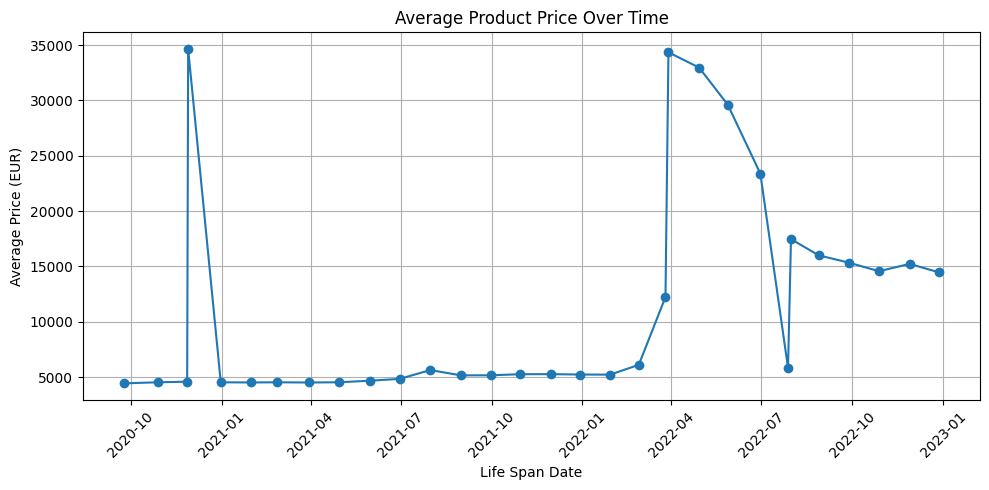

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_curr is the DataFrame you've already loaded
# Grouping by life_span_date and calculating the average price in EUR
avg_price_over_time = df_curr.groupby('life_span_date')['price_EUR'].mean().reset_index()

# Plotting the average price over time
plt.figure(figsize=(10, 5))
plt.plot(avg_price_over_time['life_span_date'], avg_price_over_time['price_EUR'], marker='o', linestyle='-')
plt.title('Average Product Price Over Time')
plt.xlabel('Life Span Date')
plt.ylabel('Average Price (EUR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
